In [1]:
from mplsoccer.pitch import Pitch, VerticalPitch
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from highlight_text import HighlightText, ax_text, fig_text

In [2]:
data = pd.read_excel('Salah Shots Data Overall.xlsx')

In [3]:
data['X'] = data['X']*1.2*100
data['Y'] = data['Y']*.8*100

In [4]:
goals_salah = data[(data['result']=='Goal') & (data['situation'] != 'Penalty')]
other_shots = data[(data['result']!= 'Goal') & (data['situation'] != 'Penalty')]

In [5]:
other_shots

,Unnamed: 0,id,minute,result,X,Y,xG,player,h_a,player_id,...,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,1,158350,37,MissedShots,110.519998,27.120001,0.055976,Mohamed Salah,a,1250,...,2017,LeftFoot,7120,Watford,Liverpool,3,3,2017-08-12 12:30:00,NaN,None
1,3,158352,48,MissedShots,102.480002,26.960001,0.051162,Mohamed Salah,a,1250,...,2017,LeftFoot,7120,Watford,Liverpool,3,3,2017-08-12 12:30:00,Georginio Wijnaldum,Pass
3,10,158359,70,MissedShots,101.039996,25.120000,0.038232,Mohamed Salah,a,1250,...,2017,LeftFoot,7120,Watford,Liverpool,3,3,2017-08-12 12:30:00,Alberto Moreno,Chipped
4,11,158361,76,MissedShots,109.680002,25.439999,0.080203,Mohamed Salah,a,1250,...,2017,RightFoot,7120,Watford,Liverpool,3,3,2017-08-12 12:30:00,Sadio Mané,Pass
5,16,158505,81,SavedShot,108.360004,48.239999,0.025693,Mohamed Salah,h,1250,...,2017,Head,7134,Liverpool,Crystal Palace,1,0,2017-08-19 15:00:00,Joseph Gomez,Aerial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,19,477920,77,SavedShot,105.360004,25.439999,0.051477,Mohamed Salah,h,1250,...,2021,LeftFoot,16753,Liverpool,Wolverhampton Wanderers,3,1,2022-05-22 15:00:00,Roberto Firmino,Pass
672,20,477921,78,BlockedShot,101.039996,28.879999,0.058323,Mohamed Salah,h,1250,...,2021,LeftFoot,16753,Liverpool,Wolverhampton Wanderers,3,1,2022-05-22 15:00:00,Sadio Mané,Pass
674,25,477928,88,BlockedShot,108.119998,38.079999,0.142387,Mohamed Salah,h,1250,...,2021,LeftFoot,16753,Liverpool,Wolverhampton Wanderers,3,1,2022-05-22 15:00:00,Trent Alexander-Arnold,Pass
675,27,477930,91,SavedShot,112.200000,35.439999,0.063157,Mohamed Salah,h,1250,...,2021,Head,16753,Liverpool,Wolverhampton Wanderers,3,1,2022-05-22 15:00:00,NaN,None


In [6]:
plt.rcParams["font.family"] = "monospace"

In [1]:
fig ,ax = plt.subplots(figsize=(15.5,12))
fig.set_facecolor('#242526')
ax.patch.set_facecolor('#242526')

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#181818', line_color='#FFFFFF', figsize=(15, 12),
              constrained_layout=False, tight_layout=True)

pitch.draw(ax=ax)

#Plotting NPG

pitch.scatter(goals_salah.X, goals_salah.Y, s=goals_salah['xG']*900,
             marker='o', edgecolors='#FF5959', c='#c54be8', zorder=2, ax=ax , alpha=0.27 , ls='--')

pitch.scatter(goals_salah.X, goals_salah.Y, s=goals_salah['xG']*900,
             marker='o', edgecolors='#c54be8', c='none', zorder=2, ax=ax , alpha=1 , ls='--' , lw=2.2)

#Plotting Non Goals

pitch.scatter(other_shots.X, other_shots.Y, s=other_shots['xG']*900,
             marker='o', edgecolors='#FFFFFF', c='none', zorder=1, ax=ax , alpha=0.12)



#Plotting Info Hexagons

pitch.scatter(28 , 62, s=4000,
             marker='h', edgecolors='#FFFFFF', c='#c54be8', zorder=2, ax=ax , alpha=0.68 , lw=2.4)

pitch.annotate('0.15' , xy=(28,62) , xytext=(24.8,61.2) , ax=ax , fontsize=18 , fontweight='bold')

pitch.annotate('npxG/Shot' , xy=(28,62) , xytext=(22.1,54.7) , ax=ax , fontsize=16 , fontweight='bold')


pitch.scatter(46 , 62, s=4000,
             marker='h', edgecolors='#FFFFFF', c='#c54be8', zorder=2, ax=ax , alpha=0.68 , lw=2.4)

pitch.annotate('0.67' , xy=(46,62) , xytext=(42.8,61.2) , ax=ax , fontsize=18 , fontweight='bold')

pitch.annotate('npxG/90' , xy=(46,62) , xytext=(40.9,54.7) , ax=ax , fontsize=16 , fontweight='bold')


pitch.scatter(28 , 18, s=4000,
             marker='h', edgecolors='#FFFFFF', c='#c54be8', zorder=2, ax=ax , alpha=0.68 , lw=2.4)

pitch.annotate('0.71' , xy=(28,18) , xytext=(24.8,17.2) , ax=ax , fontsize=18 , fontweight='bold')

pitch.annotate('NPG/90' , xy=(28,18) , xytext=(23.45,10.7) , ax=ax , fontsize=16 , fontweight='bold')


pitch.scatter(46 , 18, s=4000,
             marker='h', edgecolors='#FFFFFF', c='#c54be8', zorder=2, ax=ax , alpha=0.68 , lw=2.4)

pitch.annotate('0.17' , xy=(46,18) , xytext=(42.8,17.2) , ax=ax , fontsize=18 , fontweight='bold')

pitch.annotate('NPG/Shot' , xy=(46,18) , xytext=(40.9,10.7) , ax=ax , fontsize=16 , fontweight='bold')





plt.gca().invert_yaxis()

fig_text(
    0.512, 0.945, "<Mohamed Salah>", size=30,
    ha="center", color="#FFFFFF" , fontweight='bold' , highlight_textprops=[{"color": '#FFFFFF'}]
)

fig_text(
    0.518, 0.898,
    "Liverpool | 2017-18 to 2021-22 Premier League | Shot Map",
    size=24,
    ha="center", color="#FFFFFF" , fontweight='bold'
)


fig_text(
    0.514, 0.851,
    "<100 Non-Penalty Goals> | <96.98 NPxG> | <657 Shots>",
    size=20,
    ha="center", color="#FFFFFF" , fontweight='bold' , highlight_textprops=[{"color": '#c54be8'} , {"color": '#c54be8'}
                                                                           , {"color": '#FFFFFF'}]
)


fig_text(
    0.800, 0.135, "Made by: @pranav_m28\nPremier League\nAge: 30 | Height: 5'7", size=14,
    ha="center", color="#FFFFFF" , fontweight='bold'
)

fig_text(
    0.220, 0.135, "81 - Right Foot <(16)>\n37 - Head <(6)>\n538 - Left Foot <(78)>", size=14,
    ha="center", color="#FFFFFF" , fontweight='bold' , highlight_textprops=[{"color": '#c54be8'}
                                                                             , {"color" : '#c54be8'} , {"color" : '#c54be8'}]
)


fig_text(
    0.510, 0.150, "Direction of Play", size=18,
    ha="center", color="#FFFFFF" , fontweight='bold'
)

plt.arrow(48.8 , -3 , 20 , 0 , fc='#FFFFFF' , ls='-' , lw=1.9 , head_length=1 , head_width=1)



plt.style.use("dark_background")
mpl.rc('axes',edgecolor='#181818' , linewidth=1.2)
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#181818' 
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'


#plt.savefig('Salah Shot Analysis.png' , dpi=300 , bbox_inches='tight')

NameError: name 'plt' is not defined

In [25]:
dribble_LTS = data[data['lastAction'] == 'TakeOn']
dribble_LTG = dribble_LTS[dribble_LTS['result'] == 'Goal']
dribble_LTNG = dribble_LTS[dribble_LTS['result'] != 'Goal']

dribble_LTG['X'].count()

12

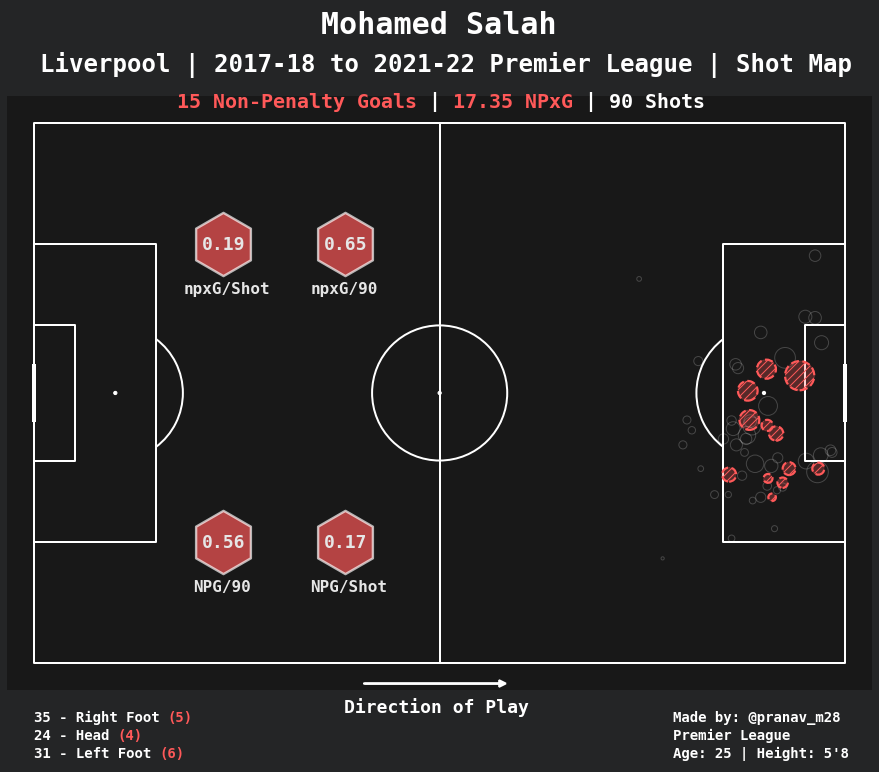

In [9]:
fig ,ax = plt.subplots(figsize=(15.5,12))
fig.set_facecolor('#242526')
ax.patch.set_facecolor('#242526')

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#181818', line_color='#FFFFFF', figsize=(15, 12),
              constrained_layout=False, tight_layout=True)

pitch.draw(ax=ax)

#Plotting Dribbles leading to goals

pitch.scatter(dribble_LTG.X, dribble_LTG.Y, s=dribble_LTG['xG']*900,
             marker='o', edgecolors='#FF5959', c='#FF5959', zorder=2, ax=ax , alpha=0.27 , ls='--')

pitch.scatter(dribble_LTG.X, dribble_LTG.Y, s=dribble_LTG['xG']*900,
             marker='o', edgecolors='#FF5959', c='none', zorder=2, ax=ax , alpha=1 , ls='--' , lw=2.2 , hatch='///')

#Plotting Non Goals

pitch.scatter(dribble_LTNG.X, dribble_LTNG.Y, s=dribble_LTNG['xG']*900,
             marker='o', edgecolors='#FFFFFF', c='none', zorder=1, ax=ax , alpha=0.20)



#Plotting Info Hexagons

pitch.scatter(28 , 62, s=4000,
             marker='h', edgecolors='#FFFFFF', c='#FF5959', zorder=2, ax=ax , alpha=0.68 , lw=2.4)

pitch.annotate('0.19' , xy=(28,62) , xytext=(24.8,61.2) , ax=ax , fontsize=18 , fontweight='bold')

pitch.annotate('npxG/Shot' , xy=(28,62) , xytext=(22.1,54.7) , ax=ax , fontsize=16 , fontweight='bold')


pitch.scatter(46 , 62, s=4000,
             marker='h', edgecolors='#FFFFFF', c='#FF5959', zorder=2, ax=ax , alpha=0.68 , lw=2.4)

pitch.annotate('0.65' , xy=(46,62) , xytext=(42.8,61.2) , ax=ax , fontsize=18 , fontweight='bold')

pitch.annotate('npxG/90' , xy=(46,62) , xytext=(40.9,54.7) , ax=ax , fontsize=16 , fontweight='bold')


pitch.scatter(28 , 18, s=4000,
             marker='h', edgecolors='#FFFFFF', c='#FF5959', zorder=2, ax=ax , alpha=0.68 , lw=2.4)

pitch.annotate('0.56' , xy=(28,18) , xytext=(24.8,17.2) , ax=ax , fontsize=18 , fontweight='bold')

pitch.annotate('NPG/90' , xy=(28,18) , xytext=(23.45,10.7) , ax=ax , fontsize=16 , fontweight='bold')


pitch.scatter(46 , 18, s=4000,
             marker='h', edgecolors='#FFFFFF', c='#FF5959', zorder=2, ax=ax , alpha=0.68 , lw=2.4)

pitch.annotate('0.17' , xy=(46,18) , xytext=(42.8,17.2) , ax=ax , fontsize=18 , fontweight='bold')

pitch.annotate('NPG/Shot' , xy=(46,18) , xytext=(40.9,10.7) , ax=ax , fontsize=16 , fontweight='bold')





plt.gca().invert_yaxis()

fig_text(
    0.512, 0.945, "<Mohamed Salah>", size=30,
    ha="center", color="#FFFFFF" , fontweight='bold' , highlight_textprops=[{"color": '#FFFFFF'}]
)

fig_text(
    0.518, 0.898,
    "Liverpool | 2017-18 to 2021-22 Premier League | Shot Map",
    size=24,
    ha="center", color="#FFFFFF" , fontweight='bold'
)


fig_text(
    0.514, 0.851,
    "<15 Non-Penalty Goals> | <17.35 NPxG> | <90 Shots>",
    size=20,
    ha="center", color="#FFFFFF" , fontweight='bold' , highlight_textprops=[{"color": '#FF5959'} , {"color": '#FF5959'}
                                                                           , {"color": '#FFFFFF'}]
)


fig_text(
    0.800, 0.135, "Made by: @pranav_m28\nPremier League\nAge: 25 | Height: 5'8", size=14,
    ha="center", color="#FFFFFF" , fontweight='bold'
)

fig_text(
    0.220, 0.135, "35 - Right Foot <(5)>\n24 - Head <(4)>\n31 - Left Foot <(6)>", size=14,
    ha="center", color="#FFFFFF" , fontweight='bold' , highlight_textprops=[{"color": '#FF5959'}
                                                                             , {"color" : '#FF5959'} , {"color" : '#FF5959'}]
)


fig_text(
    0.510, 0.150, "Direction of Play", size=18,
    ha="center", color="#FFFFFF" , fontweight='bold'
)

plt.arrow(48.8 , -3 , 20 , 0 , fc='#FFFFFF' , ls='-' , lw=1.9 , head_length=1 , head_width=1)



plt.style.use("dark_background")
mpl.rc('axes',edgecolor='#181818' , linewidth=1.2)
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#181818' 
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'


In [26]:
assist_trent = data[(data['player_assisted'] == 'Roberto Firmino') | (data['player_assisted'] == 'Roberto Firmino')]
assist_trent_g = assist_trent[assist_trent['result'] == 'Goal']
assist_trent_ng = assist_trent[assist_trent['result'] != 'Goal']

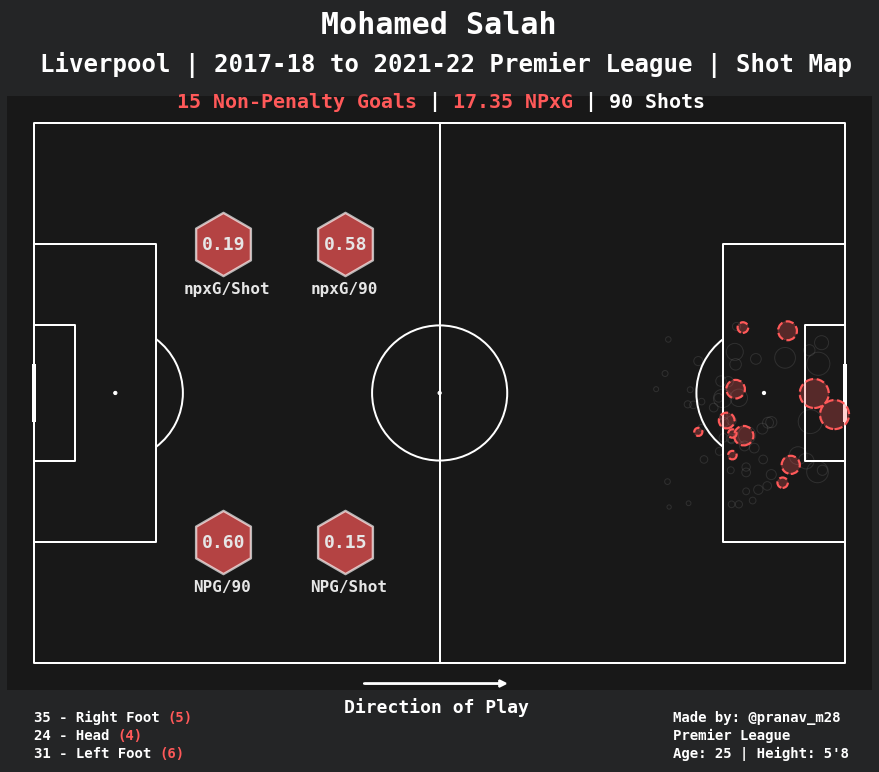

In [27]:
fig ,ax = plt.subplots(figsize=(15.5,12))
fig.set_facecolor('#242526')
ax.patch.set_facecolor('#242526')

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#181818', line_color='#FFFFFF', figsize=(15, 12),
              constrained_layout=False, tight_layout=True)

pitch.draw(ax=ax)

#Plotting Dribbles leading to goals

pitch.scatter(assist_trent_g.X, assist_trent_g.Y, s=assist_trent_g['xG']*900,
             marker='o', edgecolors='#FF5959', c='#FF5959', zorder=2, ax=ax , alpha=0.27 , ls='--')

pitch.scatter(assist_trent_g.X, assist_trent_g.Y, s=assist_trent_g['xG']*900,
             marker='o', edgecolors='#FF5959', c='none', zorder=2, ax=ax , alpha=1 , ls='--' , lw=2.2)

#Plotting Non Goals

pitch.scatter(assist_trent_ng.X, assist_trent_ng.Y, s=assist_trent_ng['xG']*900,
             marker='o', edgecolors='#FFFFFF', c='none', zorder=1, ax=ax , alpha=0.10)



#Plotting Info Hexagons

pitch.scatter(28 , 62, s=4000,
             marker='h', edgecolors='#FFFFFF', c='#FF5959', zorder=2, ax=ax , alpha=0.68 , lw=2.4)

pitch.annotate('0.19' , xy=(28,62) , xytext=(24.8,61.2) , ax=ax , fontsize=18 , fontweight='bold')

pitch.annotate('npxG/Shot' , xy=(28,62) , xytext=(22.1,54.7) , ax=ax , fontsize=16 , fontweight='bold')


pitch.scatter(46 , 62, s=4000,
             marker='h', edgecolors='#FFFFFF', c='#FF5959', zorder=2, ax=ax , alpha=0.68 , lw=2.4)

pitch.annotate('0.58' , xy=(46,62) , xytext=(42.8,61.2) , ax=ax , fontsize=18 , fontweight='bold')

pitch.annotate('npxG/90' , xy=(46,62) , xytext=(40.9,54.7) , ax=ax , fontsize=16 , fontweight='bold')


pitch.scatter(28 , 18, s=4000,
             marker='h', edgecolors='#FFFFFF', c='#FF5959', zorder=2, ax=ax , alpha=0.68 , lw=2.4)

pitch.annotate('0.60' , xy=(28,18) , xytext=(24.8,17.2) , ax=ax , fontsize=18 , fontweight='bold')

pitch.annotate('NPG/90' , xy=(28,18) , xytext=(23.45,10.7) , ax=ax , fontsize=16 , fontweight='bold')


pitch.scatter(46 , 18, s=4000,
             marker='h', edgecolors='#FFFFFF', c='#FF5959', zorder=2, ax=ax , alpha=0.68 , lw=2.4)

pitch.annotate('0.15' , xy=(46,18) , xytext=(42.8,17.2) , ax=ax , fontsize=18 , fontweight='bold')

pitch.annotate('NPG/Shot' , xy=(46,18) , xytext=(40.9,10.7) , ax=ax , fontsize=16 , fontweight='bold')





plt.gca().invert_yaxis()

fig_text(
    0.512, 0.945, "<Mohamed Salah>", size=30,
    ha="center", color="#FFFFFF" , fontweight='bold' , highlight_textprops=[{"color": '#FFFFFF'}]
)

fig_text(
    0.518, 0.898,
    "Liverpool | 2017-18 to 2021-22 Premier League | Shot Map",
    size=24,
    ha="center", color="#FFFFFF" , fontweight='bold'
)


fig_text(
    0.514, 0.851,
    "<15 Non-Penalty Goals> | <17.35 NPxG> | <90 Shots>",
    size=20,
    ha="center", color="#FFFFFF" , fontweight='bold' , highlight_textprops=[{"color": '#FF5959'} , {"color": '#FF5959'}
                                                                           , {"color": '#FFFFFF'}]
)


fig_text(
    0.800, 0.135, "Made by: @pranav_m28\nPremier League\nAge: 25 | Height: 5'8", size=14,
    ha="center", color="#FFFFFF" , fontweight='bold'
)

fig_text(
    0.220, 0.135, "35 - Right Foot <(5)>\n24 - Head <(4)>\n31 - Left Foot <(6)>", size=14,
    ha="center", color="#FFFFFF" , fontweight='bold' , highlight_textprops=[{"color": '#FF5959'}
                                                                             , {"color" : '#FF5959'} , {"color" : '#FF5959'}]
)


fig_text(
    0.510, 0.150, "Direction of Play", size=18,
    ha="center", color="#FFFFFF" , fontweight='bold'
)

plt.arrow(48.8 , -3 , 20 , 0 , fc='#FFFFFF' , ls='-' , lw=1.9 , head_length=1 , head_width=1)



plt.style.use("dark_background")
mpl.rc('axes',edgecolor='#181818' , linewidth=1.2)
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#181818' 
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'

In [28]:
assist_trent_g

,Unnamed: 0,id,minute,result,X,Y,xG,player,h_a,player_id,...,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
2,6,158355,56,Goal,118.439996,36.800000,0.936432,Mohamed Salah,a,1250,...,2017,LeftFoot,7120,Watford,Liverpool,3,3,2017-08-12 12:30:00,Roberto Firmino,Rebound
69,9,182890,51,Goal,98.280002,34.239999,0.073205,Mohamed Salah,a,1250,...,2017,LeftFoot,7301,Arsenal,Liverpool,3,3,2017-12-22 19:45:00,Roberto Firmino,Pass
99,4,193950,41,Goal,103.800000,40.560001,0.384288,Mohamed Salah,a,1250,...,2017,LeftFoot,7384,Southampton,Liverpool,0,2,2018-02-11 16:30:00,Roberto Firmino,Throughball
154,4,233319,22,Goal,103.319998,30.800000,0.080940,Mohamed Salah,h,1250,...,2018,LeftFoot,9223,Liverpool,Brighton,1,0,2018-08-25 19:30:00,Roberto Firmino,Pass
198,6,251016,47,Goal,104.880002,49.679999,0.125696,Mohamed Salah,a,1250,...,2018,LeftFoot,9355,Bournemouth,Liverpool,0,4,2018-12-08 12:30:00,Roberto Firmino,Pass
227,9,275499,47,Goal,105.000000,33.679999,0.420732,Mohamed Salah,h,1250,...,2018,LeftFoot,9455,Liverpool,Bournemouth,3,0,2019-02-09 15:00:00,Roberto Firmino,Pass
280,1,309898,18,Goal,111.960004,29.360001,0.366817,Mohamed Salah,h,1250,...,2019,LeftFoot,11643,Liverpool,Norwich,4,1,2019-08-09 20:00:00,Roberto Firmino,Pass
295,18,317048,71,Goal,111.480002,49.200000,0.395573,Mohamed Salah,h,1250,...,2019,LeftFoot,11683,Liverpool,Newcastle United,3,1,2019-09-14 11:30:00,Roberto Firmino,Pass
364,14,352567,89,Goal,115.439996,39.920001,0.934837,Mohamed Salah,h,1250,...,2019,LeftFoot,11887,Liverpool,Southampton,4,0,2020-02-01 15:00:00,Roberto Firmino,Pass
430,9,381509,59,Goal,102.480002,35.920001,0.274388,Mohamed Salah,a,1250,...,2020,LeftFoot,14466,Aston Villa,Liverpool,7,2,2020-10-04 18:15:00,Roberto Firmino,Pass


In [13]:
data['player_assisted'].value_counts()

Sadio Mané                 86
Roberto Firmino            68
Trent Alexander-Arnold     62
Andrew Robertson           39
Jordan Henderson           26
Alex Oxlade-Chamberlain    21
Georginio Wijnaldum        20
James Milner               20
Fabinho                    20
Naby Keita                 15
Joseph Gomez               13
Thiago Alcántara           12
Diogo Jota                 11
Virgil van Dijk            10
Xherdan Shaqiri            10
Daniel Sturridge            7
Curtis Jones                7
Philippe Coutinho           7
Adam Lallana                6
Alberto Moreno              6
Luis Díaz                   6
Joel Matip                  5
Emre Can                    4
Harvey Elliott              4
Divock Origi                3
Konstantinos Tsimikas       3
Alisson                     2
Nathaniel Phillips          2
Neco Williams               1
Rhys Williams               1
Name: player_assisted, dtype: int64

In [14]:
goals_salah['player_assisted'].value_counts()

Roberto Firmino            12
Sadio Mané                 12
Andrew Robertson            8
Alex Oxlade-Chamberlain     6
Trent Alexander-Arnold      6
Jordan Henderson            5
Fabinho                     4
Naby Keita                  3
Curtis Jones                3
Philippe Coutinho           2
Xherdan Shaqiri             2
Virgil van Dijk             2
Alisson                     2
Joel Matip                  2
Diogo Jota                  2
Georginio Wijnaldum         1
Joseph Gomez                1
James Milner                1
Emre Can                    1
Divock Origi                1
Name: player_assisted, dtype: int64

In [15]:
100/(14974/90)

0.6010418057967144

In [16]:
96.98/657

0.1476103500761035

In [17]:
goals_salah['X'].count()

100

In [18]:
other_shots['X'].count()

557

In [19]:
goals_salah['xG'].sum() + other_shots['xG'].sum()

96.98403866682187

In [20]:
other_shots['xG'].sum()

64.18441441655149

In [21]:
goals_salah['shotType'].value_counts()

LeftFoot     78
RightFoot    16
Head          6
Name: shotType, dtype: int64

In [22]:
other_shots['shotType'].value_counts()

LeftFoot         460
RightFoot         65
Head              31
OtherBodyPart      1
Name: shotType, dtype: int64